# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df=pd.read_csv('../data/checker_regression.csv')
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          77 non-null     object 
 1   num_commits  77 non-null     int64  
 2   pageviews    77 non-null     float64
 3   AVG(diff)    77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [3]:
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.0
1,user_1,62,28.0,0.0
2,user_1,62,28.0,0.0
3,user_1,62,28.0,0.0
4,user_1,62,28.0,0.0


In [4]:
x_train, x_test, y_train,y_test=train_test_split(df.drop(columns=['AVG(diff)', 'uid']), df['AVG(diff)'],random_state=21, test_size=0.2) 

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [5]:
def crossval(n_splits, x,y,model):
    kf=KFold(n_splits=n_splits, random_state=21, shuffle=True)
    train_rmse=[]
    test_rmse=[]
    for tr_index, test_index in kf.split(x):
        x_train, x_test=x.iloc[tr_index], x.iloc[test_index]
        y_train, y_test=y.iloc[tr_index], y.iloc[test_index]
        model.fit(x_train,y_train)
        y_tr_predict=model.predict(x_train)
        y_test_predict=model.predict(x_test)
        rmse_train=np.sqrt(mean_squared_error(y_train, y_tr_predict))
        rmse_test=np.sqrt(mean_squared_error(y_test, y_test_predict))
        train_rmse.append(rmse_train)
        test_rmse.append(rmse_test)

        
    for i in range(n_splits):
        print(f'train - {train_rmse[i]}  |    test - {test_rmse[i]}')
    avg_rmse=np.mean(test_rmse)
    print(f'Average RMSE on crossval is {avg_rmse}')

In [6]:
linear_reg=LinearRegression()
crossval(n_splits=10, x=x_train, y=y_train, model=linear_reg)

train - 43.85193506275826  |    test - 42.01528915581881
train - 41.80101617667962  |    test - 58.19069641798876
train - 44.69553999765828  |    test - 34.892720193433675
train - 38.84549642903112  |    test - 76.60149754412575
train - 44.860797582621885  |    test - 31.904314868671182
train - 44.855033493587875  |    test - 30.369016640380945
train - 42.07183083893711  |    test - 56.10331212526736
train - 45.6755157436544  |    test - 16.544000169395822
train - 43.60670981884092  |    test - 45.85548116615201
train - 44.2670184108396  |    test - 39.06886806726505
Average RMSE on crossval is 43.15451963484993


In [7]:
tree=DecisionTreeRegressor(random_state=21, max_depth=5)
crossval(n_splits=10, x=x_train, y=y_train, model=tree)

train - 15.951539265483806  |    test - 36.99012309183636
train - 12.05122117539056  |    test - 38.58966965609665
train - 12.921582837652013  |    test - 33.47635981803677
train - 0.0  |    test - 60.36467571414655
train - 12.958608152595913  |    test - 21.28334420951606
train - 14.172846542758414  |    test - 23.43345187262574
train - 16.65806485097007  |    test - 36.60840517173764
train - 9.610251786188508  |    test - 71.57332940056288
train - 9.304158405592826  |    test - 60.09094072659711
train - 13.67659026263934  |    test - 46.33618096764845
Average RMSE on crossval is 42.87464806288042


In [8]:
forest=RandomForestRegressor(random_state=21, max_depth=5)
crossval(n_splits=10, x=x_train, y=y_train, model=forest)

train - 16.47826840346481  |    test - 20.57502583846312
train - 15.298264194213512  |    test - 37.63117929764362
train - 15.169035519398992  |    test - 38.7844456714923
train - 12.305434265444733  |    test - 58.21749143606286
train - 16.027456611438712  |    test - 26.006155485563035
train - 17.001112253454973  |    test - 9.096221956674075
train - 16.2053389670381  |    test - 28.983758414431826
train - 13.603849538746909  |    test - 56.50984344402768
train - 14.264441755242235  |    test - 38.55283113306214
train - 15.070648189121407  |    test - 32.76235883052869
Average RMSE on crossval is 34.71193115079493


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [9]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

tree_model=DecisionTreeRegressor(random_state=21, max_depth=5)
tree_model.fit(x_train,y_train)

forest_model=RandomForestRegressor(random_state=21, max_depth=5)
forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, random_state=21)

In [10]:
lr_predict=lr_model.predict(x_test)
tree_predict=tree_model.predict(x_test)
forest_predict=forest.predict(x_test)

In [11]:
def plot_results(y, y_predict, model):
    plt.figure(figsize=(15,8))
    plt.scatter(y, y_predict, color='purple')
    plt.plot([min(y),max(y)], [min(y_predict),max(y_predict)], color='c')
    plt.xlabel('prognozed')
    plt.ylabel('predicted')
    plt.title('prognozed vs predicted')
    plt.show()

linear regression


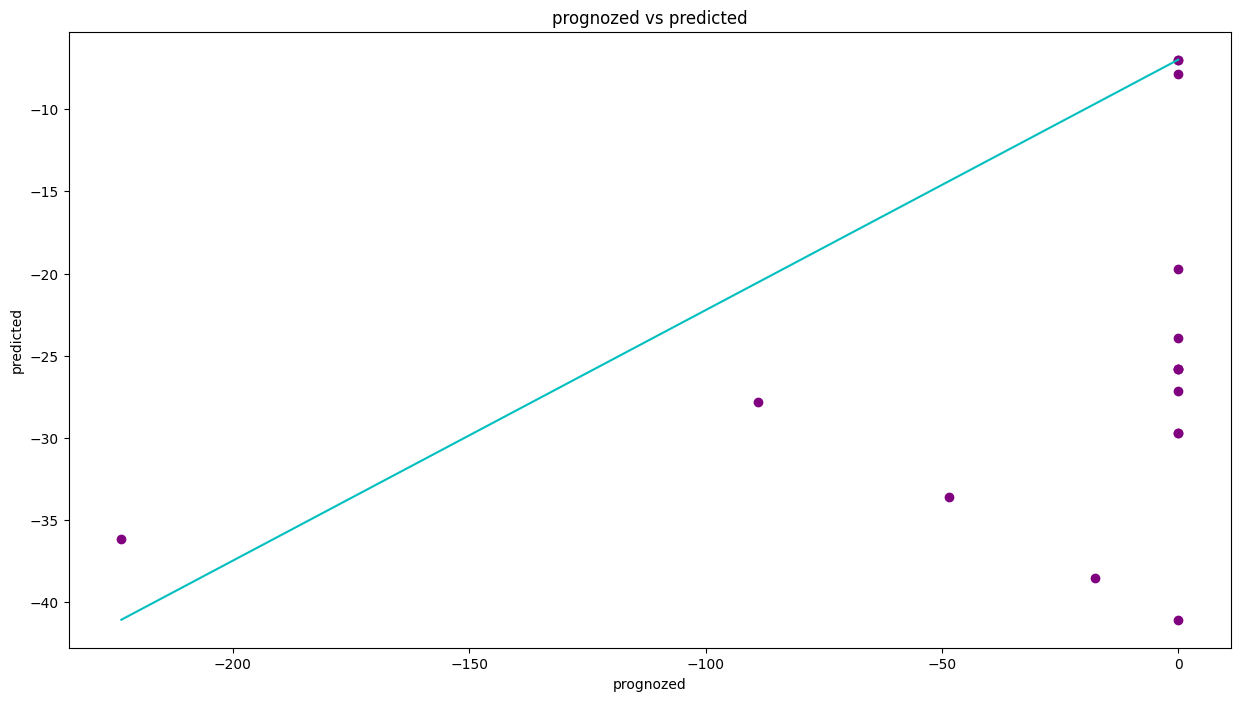

In [12]:
print('linear regression')
plot_results(y_test, lr_predict, lr_model)

decision tree regression


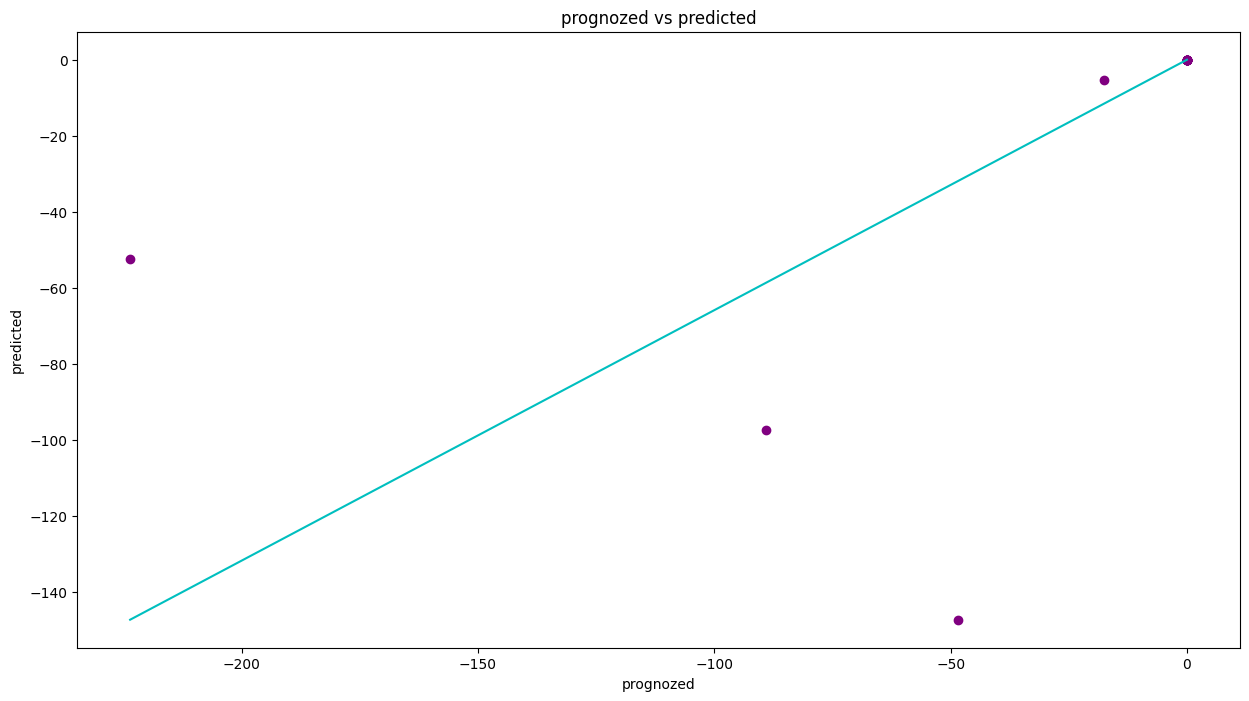

In [13]:
print('decision tree regression')
plot_results(y_test, tree_predict, tree_model)

random forest regression


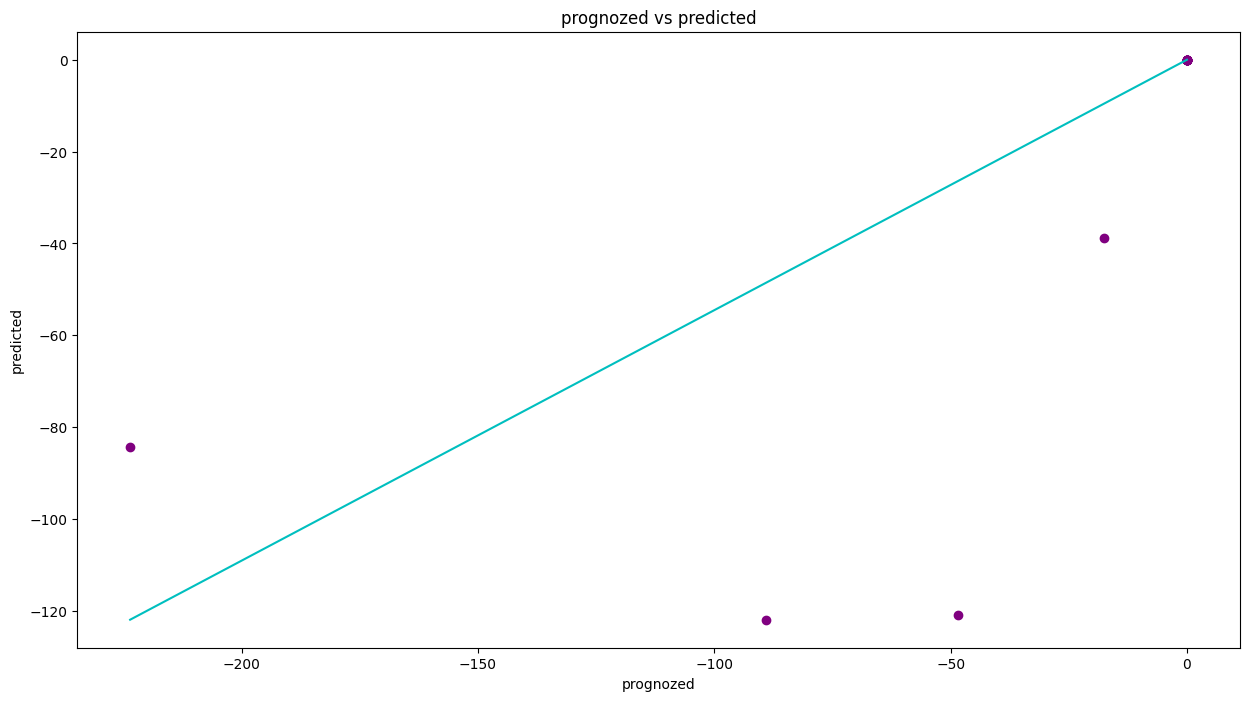

In [14]:
print('random forest regression')
plot_results(y_test,forest_predict, forest_model)

diagonal